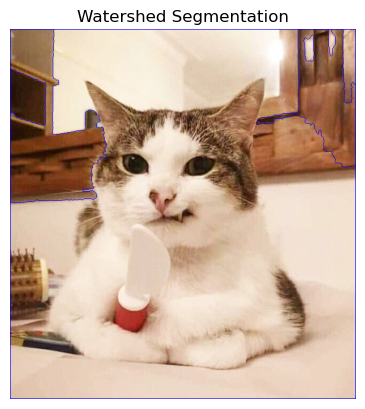

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Bước 1: Đọc ảnh
img = cv2.imread('D:/SUM25/CPV/code_at_home/cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Bước 2: Threshold + Noise Removal
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Bước 3: Xác định chắc chắn vùng nền
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Bước 4: Xác định chắc chắn vùng tiền cảnh (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Bước 5: Vùng không chắc chắn
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Bước 6: Gán nhãn vùng foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Tăng nhãn để background != 0
markers = markers + 1

# Đánh dấu vùng unknown là 0
markers[unknown == 255] = 0

# Bước 7: Áp dụng Watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Biên vùng tô màu đỏ

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()
